<a href="https://colab.research.google.com/github/EnesEY/ML_Notebooks_Enes/blob/main/h2oEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and initialize modules**

In [ ]:
# install h2o and import data
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
# imports
# h2o Python API with specific classes
import h2o                                        
from h2o.estimators.gbm import H2OGradientBoostingEstimator       # for GBM
from h2o.estimators.random_forest import H2ORandomForestEstimator # for single tree
from h2o.backend import H2OLocalServer                            # for plotting local tree in-notebook
import numpy as np   # array, vector, matrix calculations
import pandas as pd  # DataFrame handling
# system packages for calling external graphviz processes
import os
import re
import subprocess
# in-notebook display
from IPython.display import Image
from IPython.display import display

In [ ]:
h2o.init()

In [ ]:
train = h2o.import_file('train_V36.csv')
validation = h2o.import_file('val_V36.csv')
test = h2o.import_file('test_V36.csv')

out = h2o.load_model("GBM_grid__1_AutoML_20210403_091537_model_18")
print('done')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
done


In [ ]:
full = h2o.import_file('full_V36.csv')
full.describe()

**Create and train models to get a model leaderboard, to see which algorithms perform the best on the problem**

In [ ]:
# load data
train = h2o.import_file('train_V36.csv')
validation = h2o.import_file('val_V36.csv')
test = h2o.import_file('test_V36.csv')
full = h2o.import_file('full_V36.csv')

# initialize target and train columns
y = "will-move"
x = train.columns
x.remove(y)
x.remove("_id")
# x.remove('weight')

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
validation[y] = validation[y].asfactor()
test[y] = test[y].asfactor()

aml = H2OAutoML(max_runtime_secs=1800,
                verbosity="info", 
                nfolds=0, 
                sort_metric="AUC",
                exclude_algos = ["StackedEnsemble", "DeepLearning", "GLM"])

aml.train(
    x = x, 
    y = y, 
    training_frame=train, 
    validation_frame=validation, 
    leaderboard_frame=test,
    weights_column="weight"
    )

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210403_091537_model_18,0.893191,0.473295,0.943034,0.211443,0.391395,0.15319
GBM_1_AutoML_20210403_091537,0.893158,0.481074,0.943533,0.230769,0.393282,0.154671
GBM_grid__1_AutoML_20210403_091537_model_29,0.893133,0.48079,0.944315,0.260444,0.393257,0.154651
XGBoost_grid__1_AutoML_20210403_091537_model_37,0.893081,0.466878,0.945357,0.19799,0.385628,0.148709
GBM_grid__1_AutoML_20210403_091537_model_22,0.893071,0.47298,0.944972,0.22195,0.388742,0.15112
XGBoost_grid__1_AutoML_20210403_091537_model_29,0.892837,0.469427,0.944703,0.211695,0.385365,0.148506
GBM_grid__1_AutoML_20210403_091537_model_30,0.892604,0.467807,0.944259,0.192528,0.386365,0.149278
GBM_grid__1_AutoML_20210403_091537_model_19,0.891611,0.458728,0.943812,0.202058,0.383824,0.147321
XGBoost_grid__1_AutoML_20210403_091537_model_28,0.890868,0.479597,0.943761,0.249292,0.387727,0.150332
GBM_grid__1_AutoML_20210403_091537_model_1,0.890127,0.484387,0.943261,0.194153,0.394561,0.155678


**Get the parameters of the final model**

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
out = h2o.get_model(model_ids[0])
my_local_model = h2o.download_model(out, path="")

**Explain AutoML instance on test data**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid__1_AutoML_20210403_091537_model_18,0.893191,0.473295,0.943034,0.211443,0.391395,0.15319,14171,0.015187,GBM
GBM_1_AutoML_20210403_091537,0.893158,0.481074,0.943533,0.230769,0.393282,0.154671,16876,0.012848,GBM
GBM_grid__1_AutoML_20210403_091537_model_29,0.893133,0.48079,0.944315,0.260444,0.393257,0.154651,15382,0.012379,GBM
XGBoost_grid__1_AutoML_20210403_091537_model_37,0.893081,0.466878,0.945357,0.19799,0.385628,0.148709,10570,0.00222,XGBoost
GBM_grid__1_AutoML_20210403_091537_model_22,0.893071,0.47298,0.944972,0.22195,0.388742,0.15112,16399,0.012626,GBM
XGBoost_grid__1_AutoML_20210403_091537_model_29,0.892837,0.469427,0.944703,0.211695,0.385365,0.148506,9045,0.001995,XGBoost
GBM_grid__1_AutoML_20210403_091537_model_30,0.892604,0.467807,0.944259,0.192528,0.386365,0.149278,16204,0.011893,GBM
GBM_grid__1_AutoML_20210403_091537_model_19,0.891611,0.458728,0.943812,0.202058,0.383824,0.147321,18618,0.01469,GBM
XGBoost_grid__1_AutoML_20210403_091537_model_28,0.890868,0.479597,0.943761,0.249292,0.387727,0.150332,8220,0.001921,XGBoost
GBM_grid__1_AutoML_20210403_091537_model_1,0.890127,0.484387,0.943261,0.194153,0.394561,0.155678,15471,0.013794,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid__1_AutoML_20210403_091537_model_18


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42064186442725965: 


,,0,1,Error,Rate
0,0,215596.0,26709.0,0.1102,(26709.0/242305.0)
1,1,20358.0,152100.0,0.118,(20358.0/172458.0)
2,Total,235954.0,178809.0,0.1135,(47067.0/414763.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

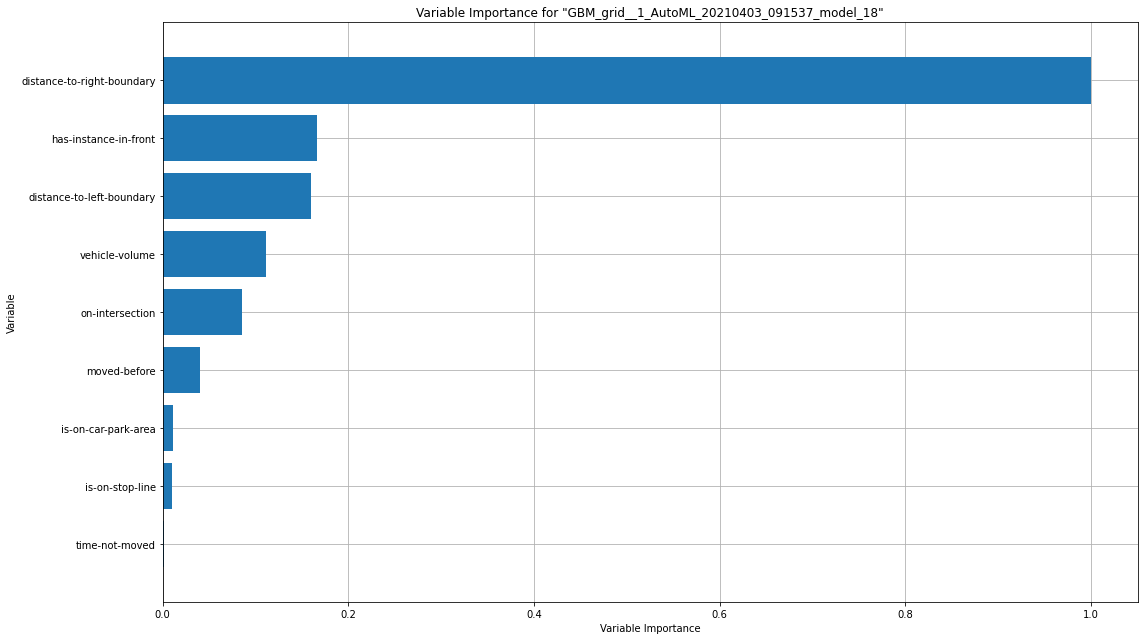

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

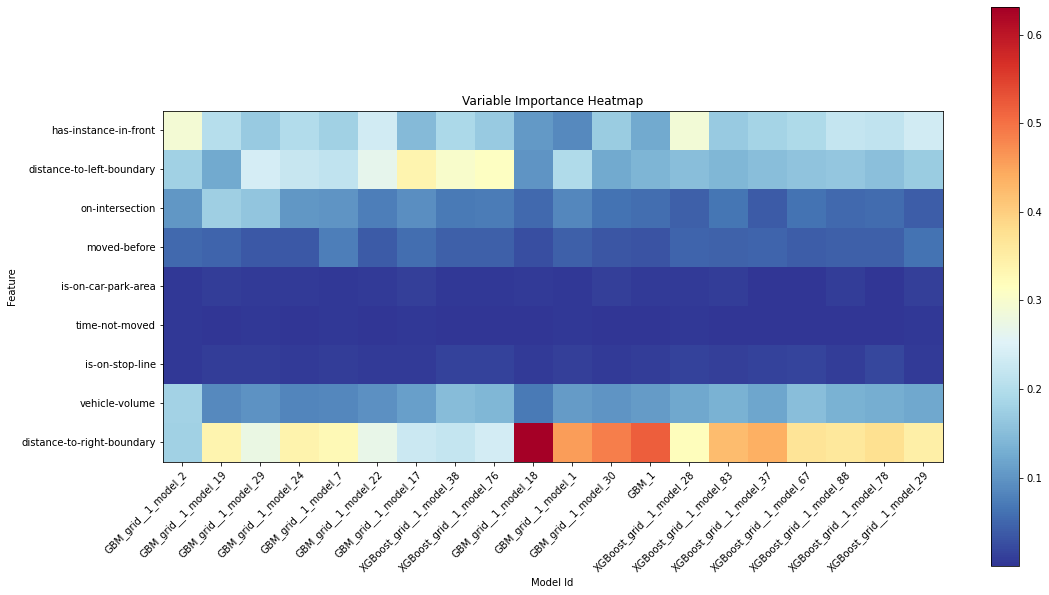

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

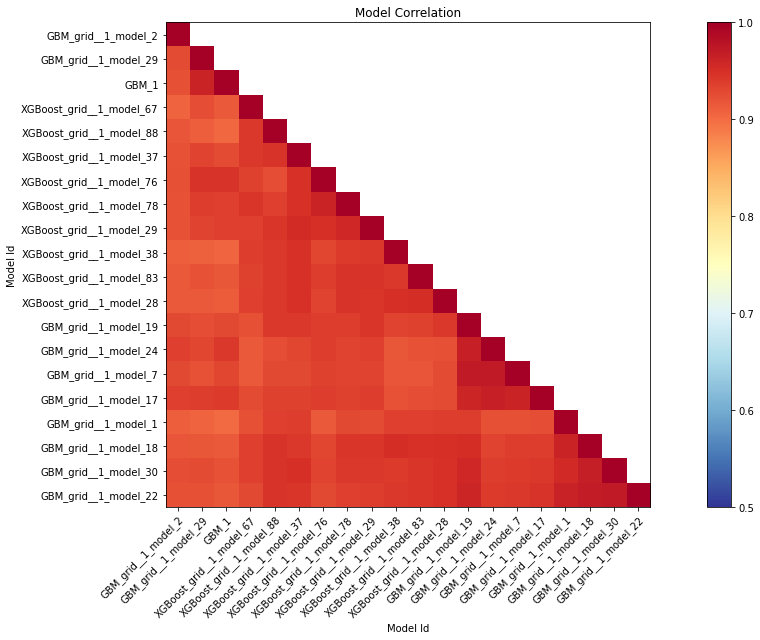

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

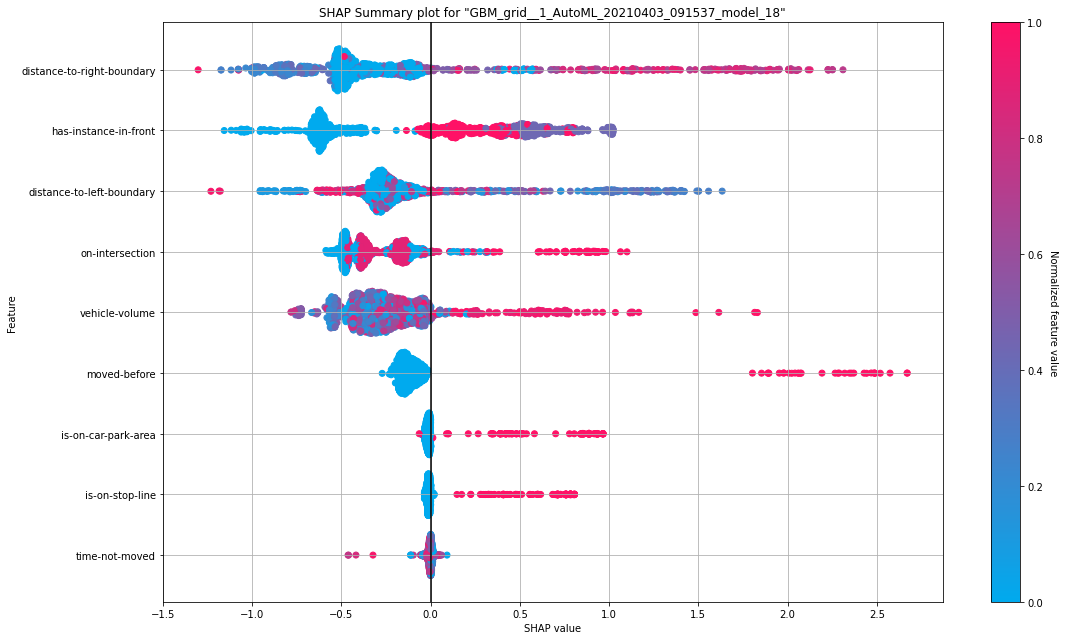

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

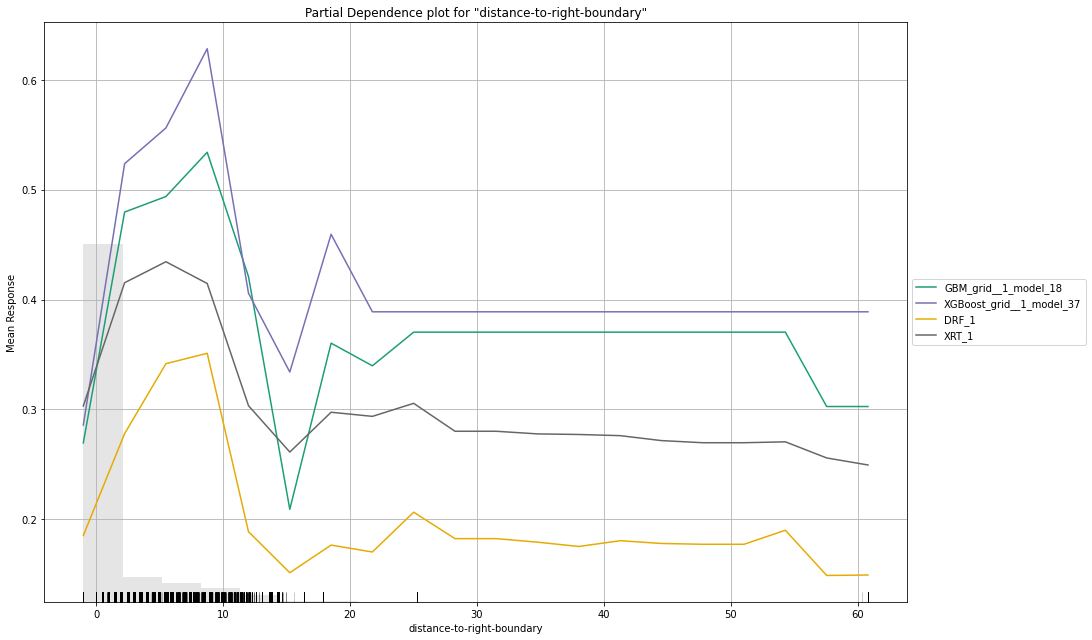

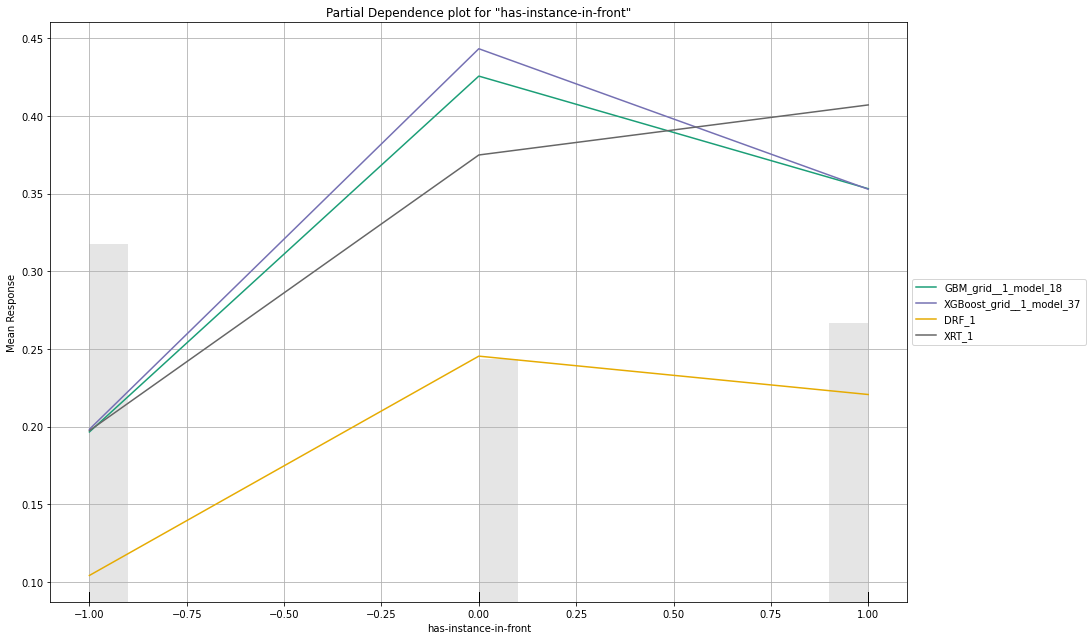

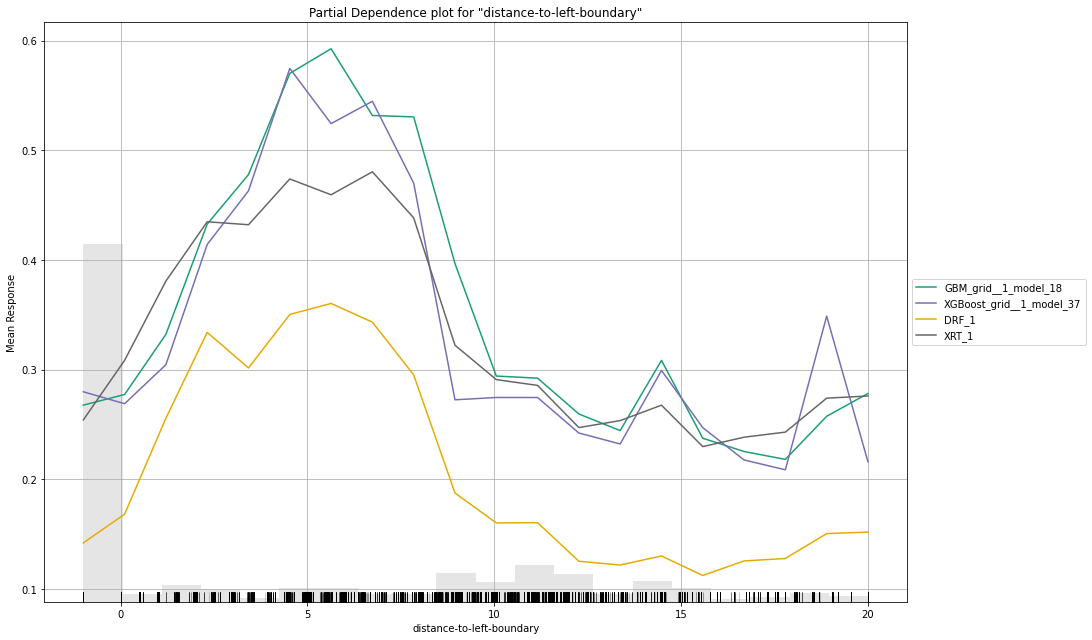

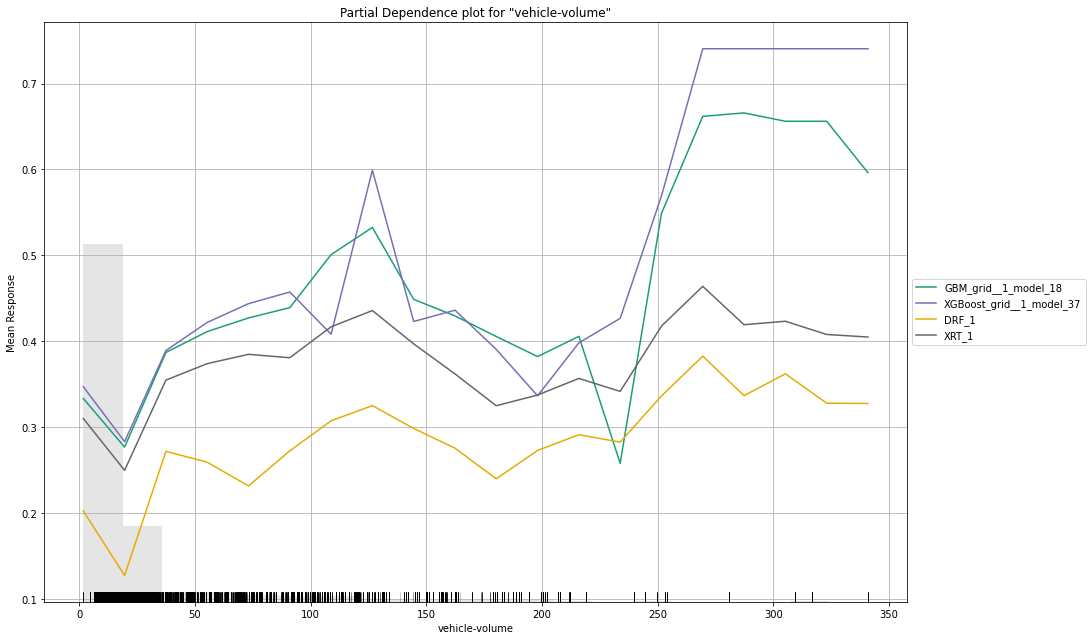

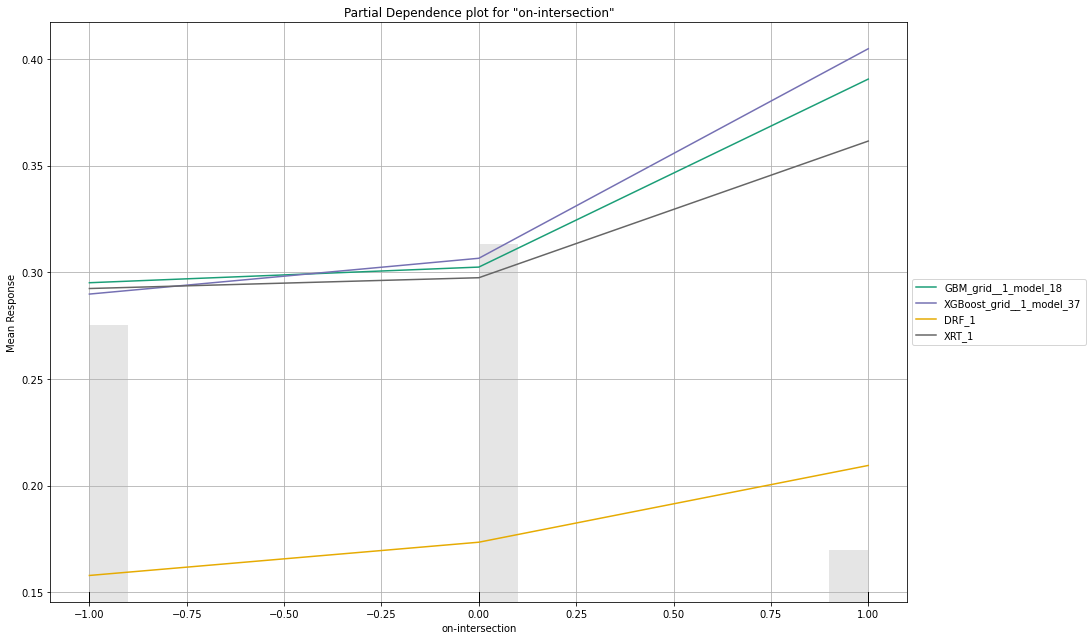

In [ ]:
# Explain an AutoML object
exa = aml.explain(test)

**describe data**

In [ ]:
full = h2o.import_file('full_V36.csv')
full.describe()

**Explain final model on test data**

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid__1_AutoML_20210403_091537_model_18


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42064186442725965: 


,,0,1,Error,Rate
0,0,215596.0,26709.0,0.1102,(26709.0/242305.0)
1,1,20358.0,152100.0,0.118,(20358.0/172458.0)
2,Total,235954.0,178809.0,0.1135,(47067.0/414763.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

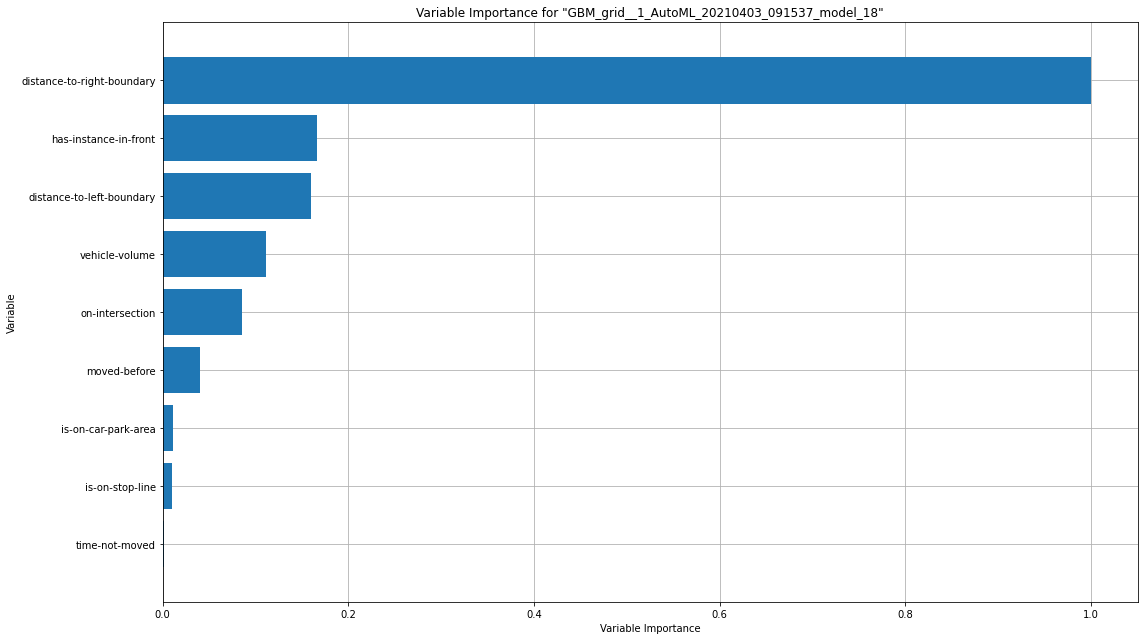

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

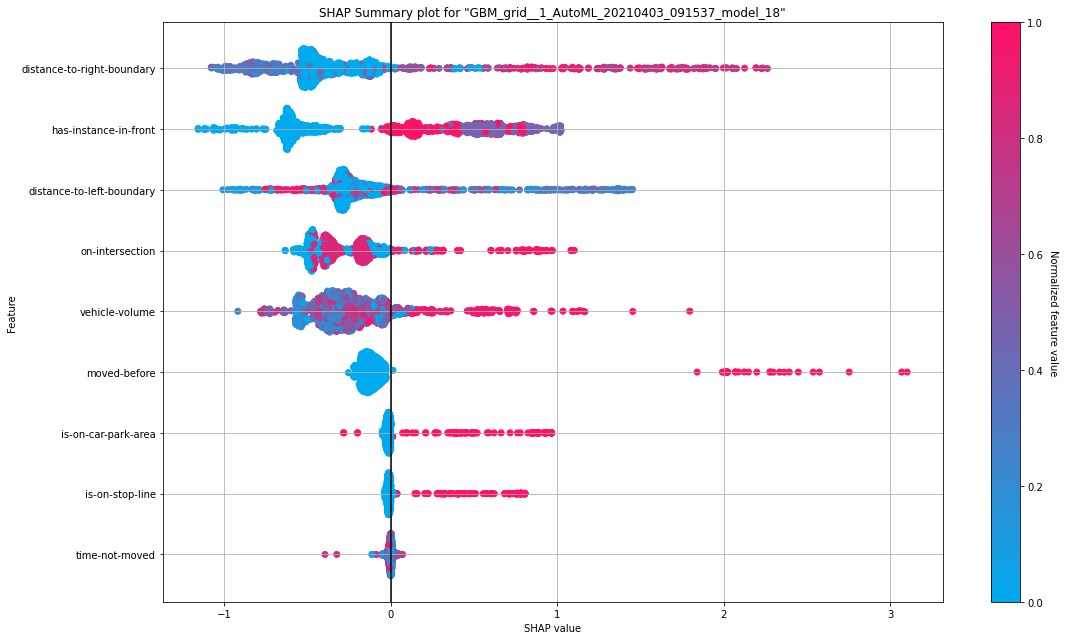

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

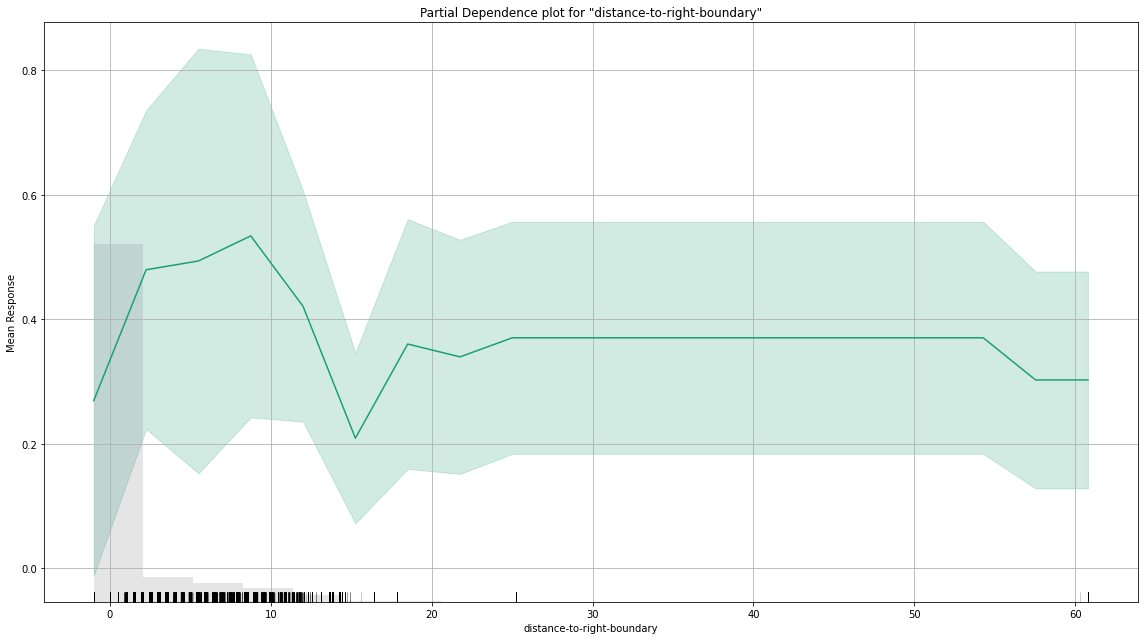

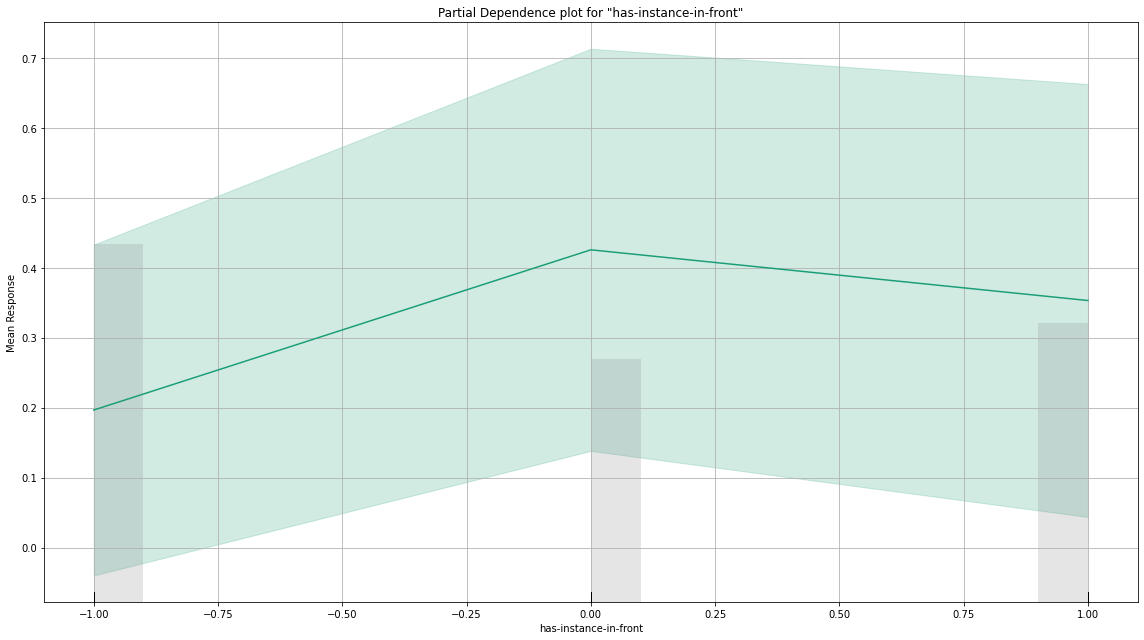

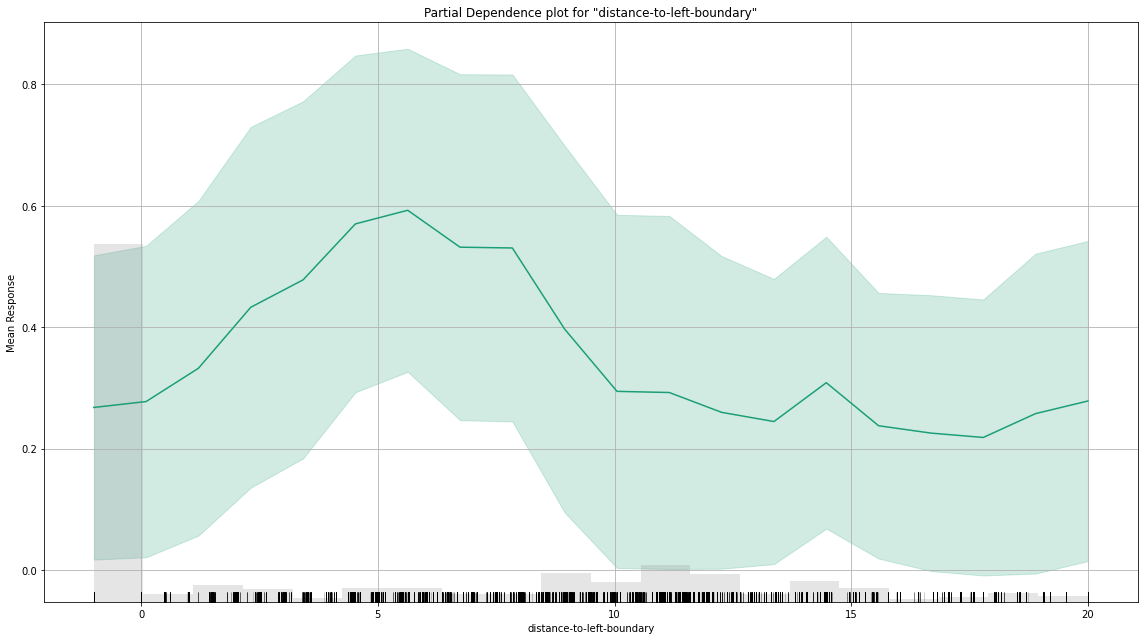

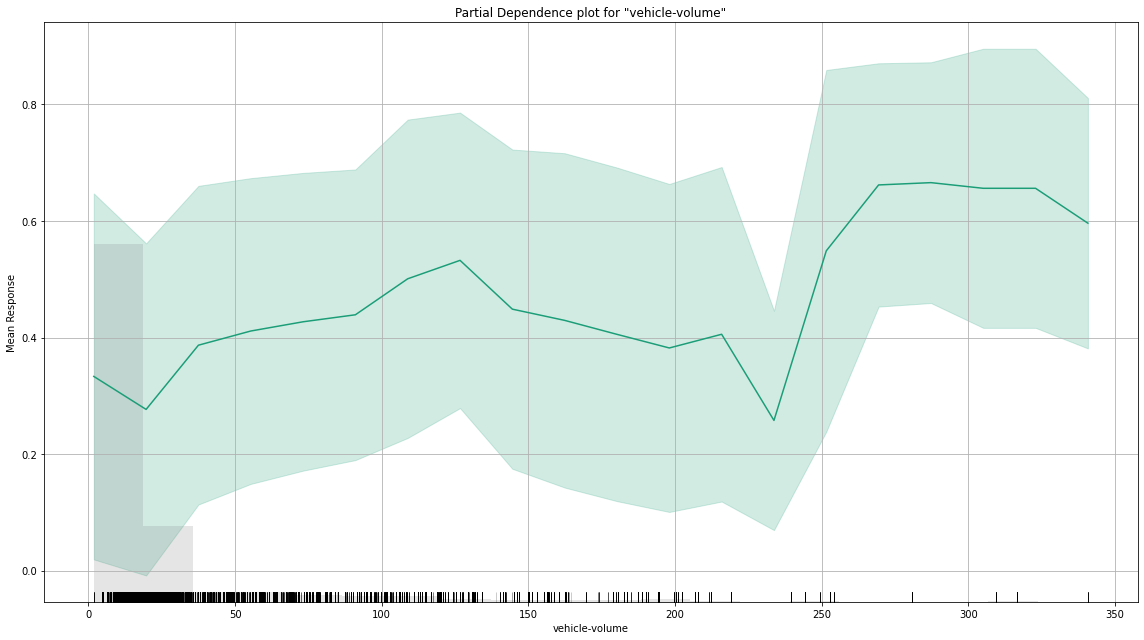

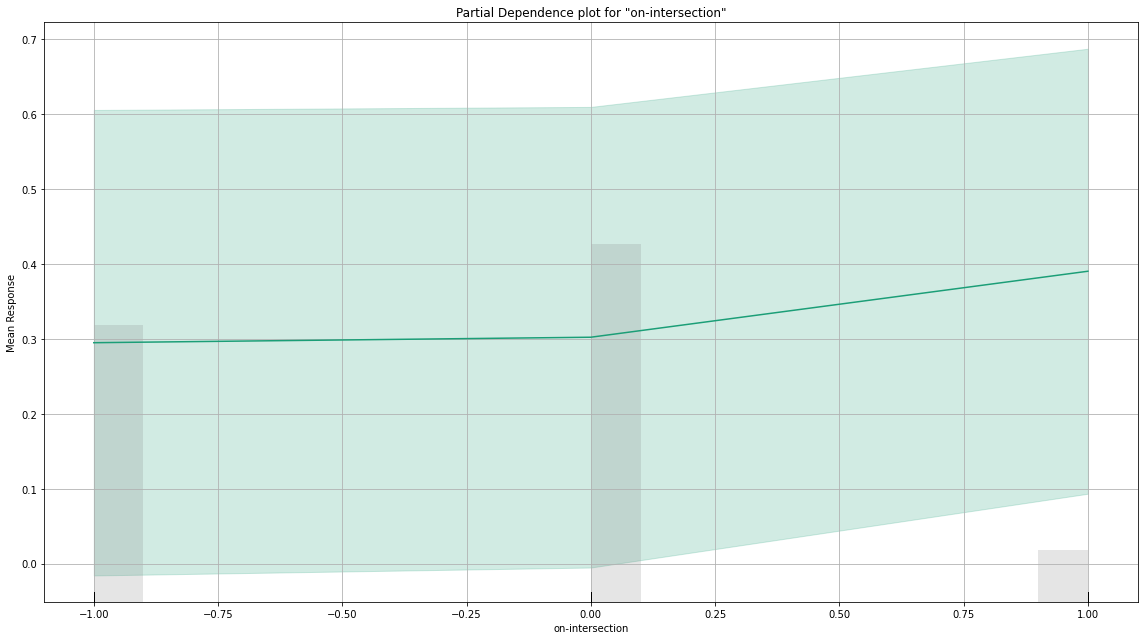

In [ ]:
# Explain a model
expl_mod = out.explain(test)

**Explain final model on validation**

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid__1_AutoML_20210403_091537_model_18


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42064186442725965: 


,,0,1,Error,Rate
0,0,215596.0,26709.0,0.1102,(26709.0/242305.0)
1,1,20358.0,152100.0,0.118,(20358.0/172458.0)
2,Total,235954.0,178809.0,0.1135,(47067.0/414763.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

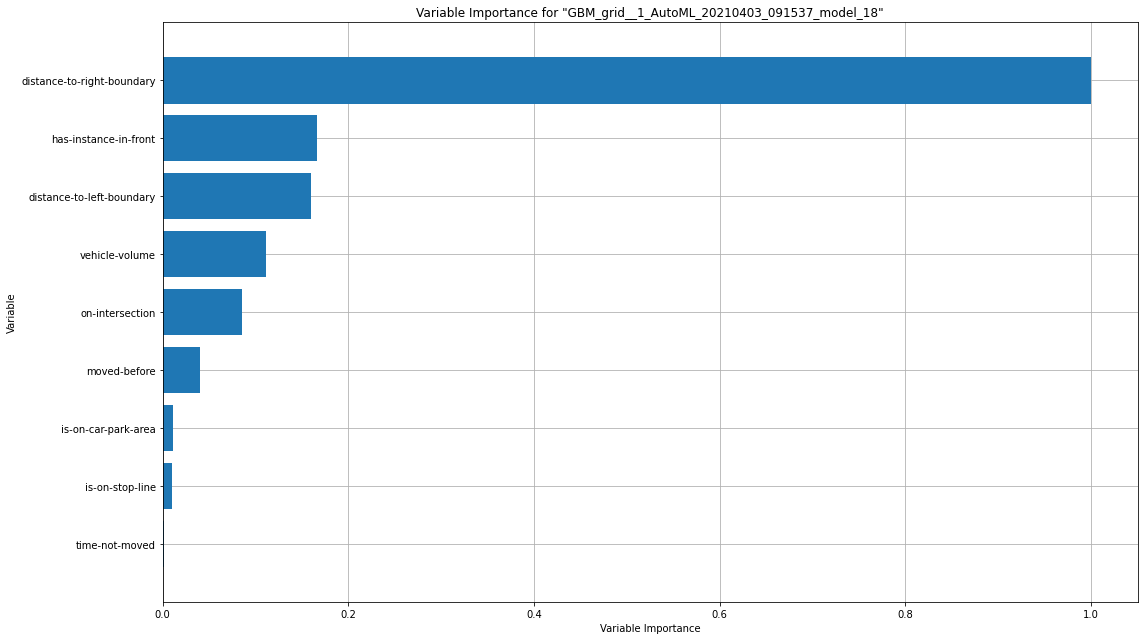

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.7/dist-packages/h2o/explanation/_explain.py:514: RuntimeWarning: invalid value encountered in true_divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))


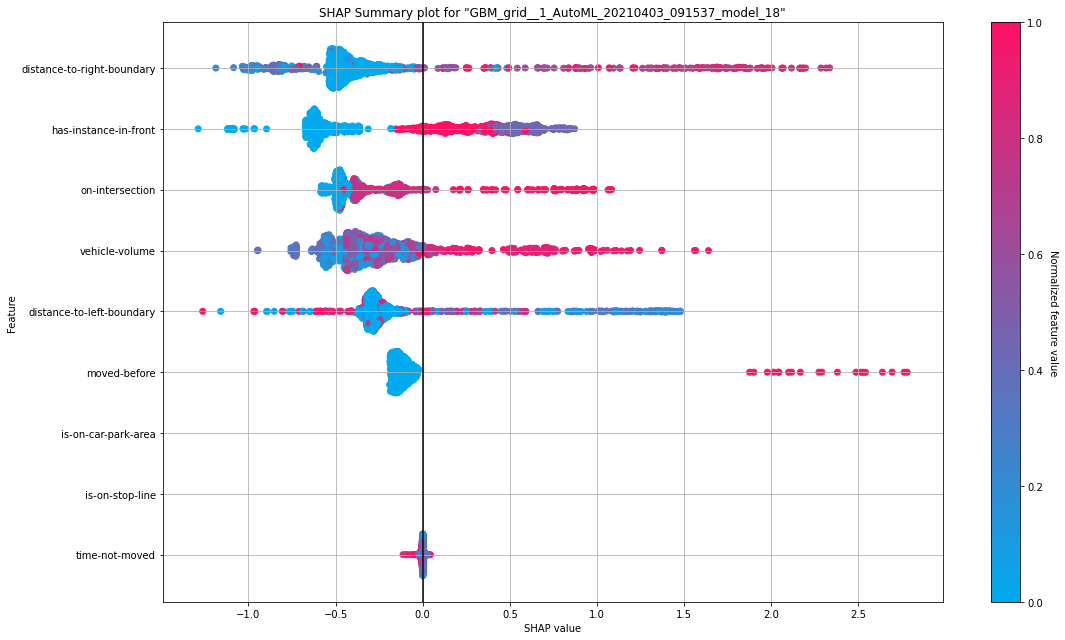

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

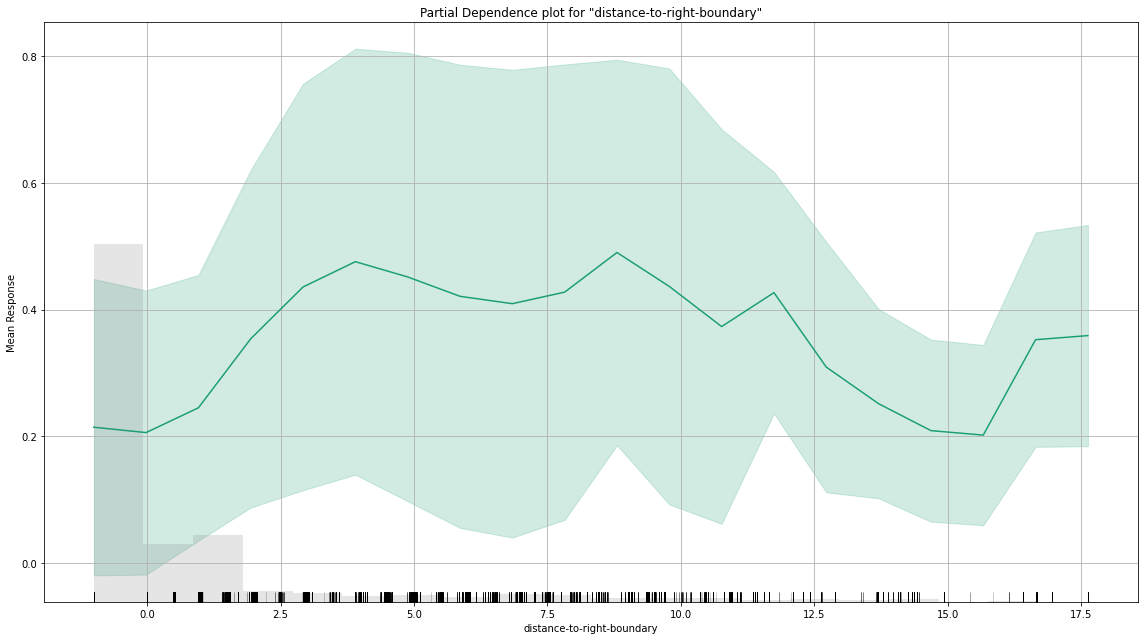

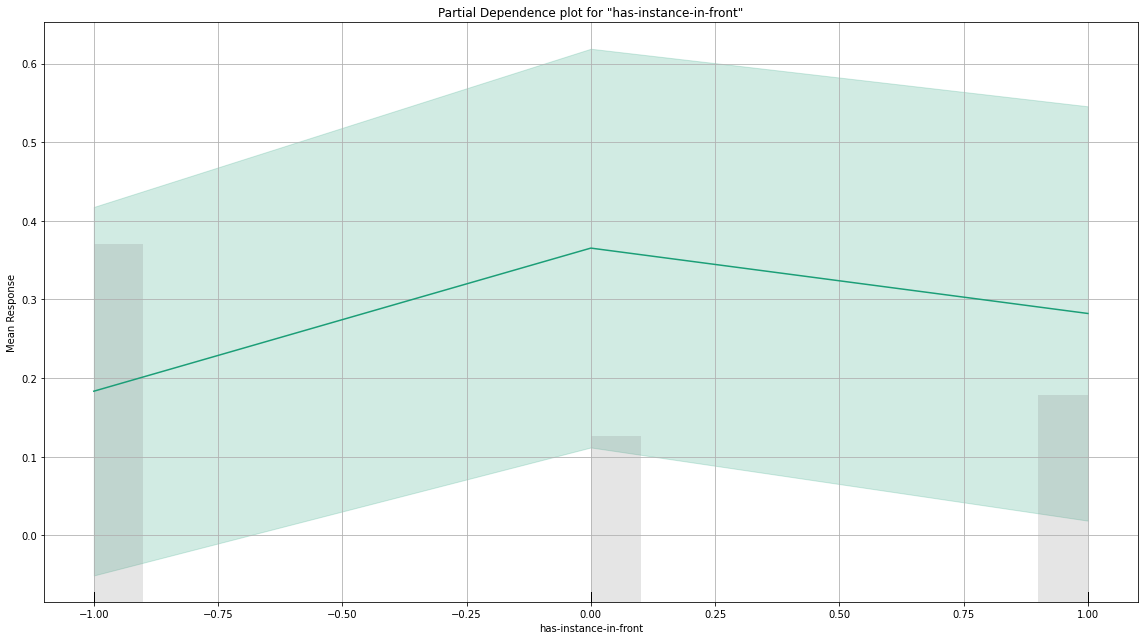

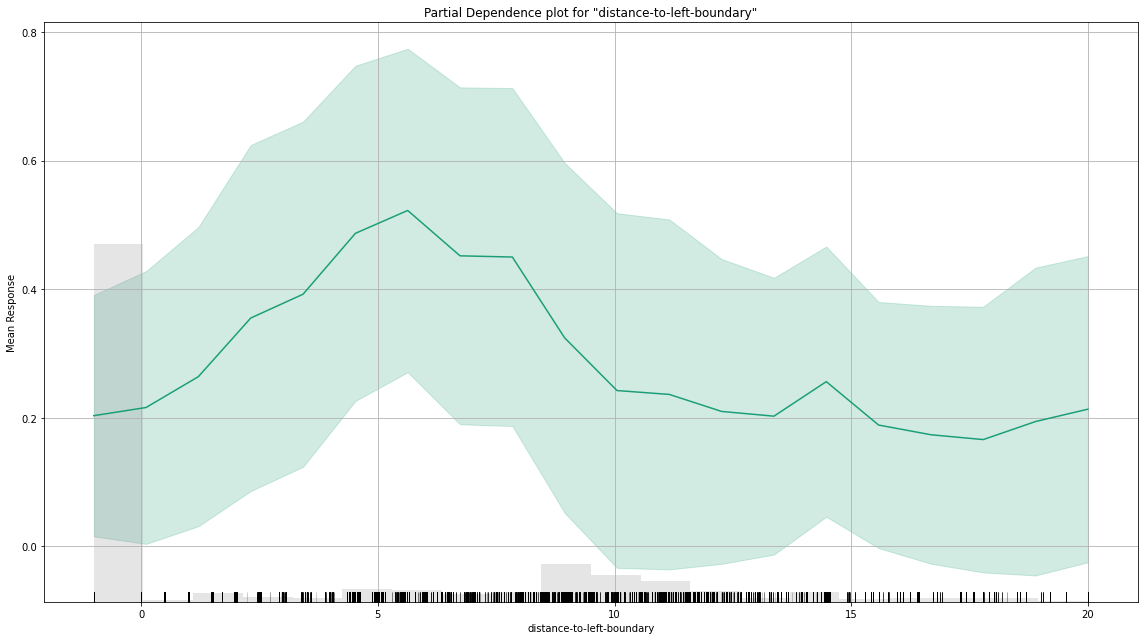

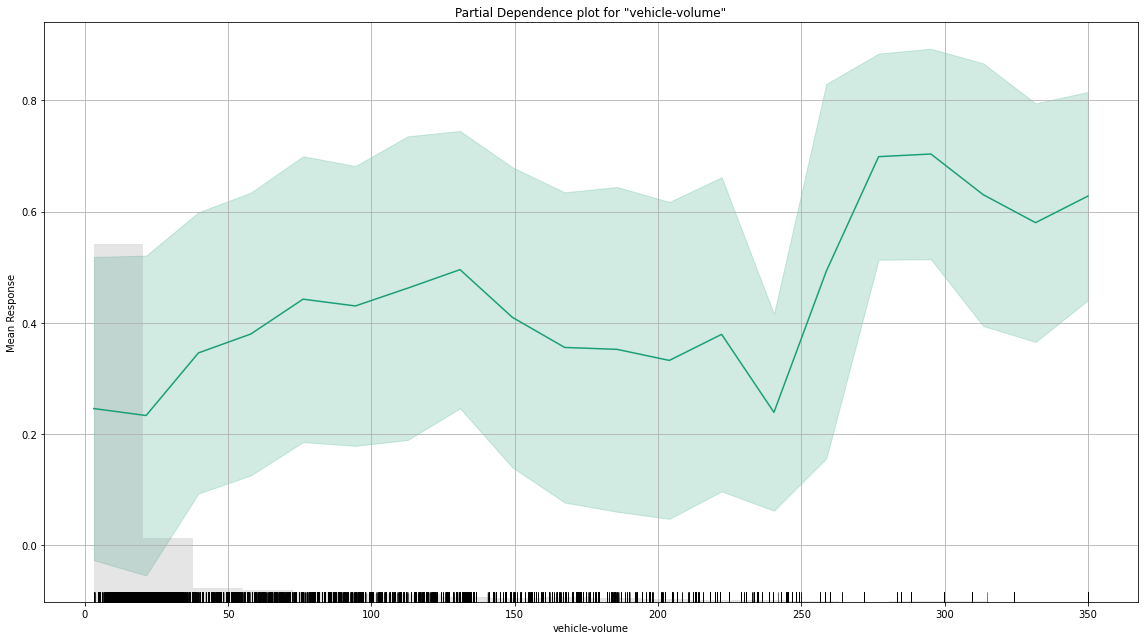

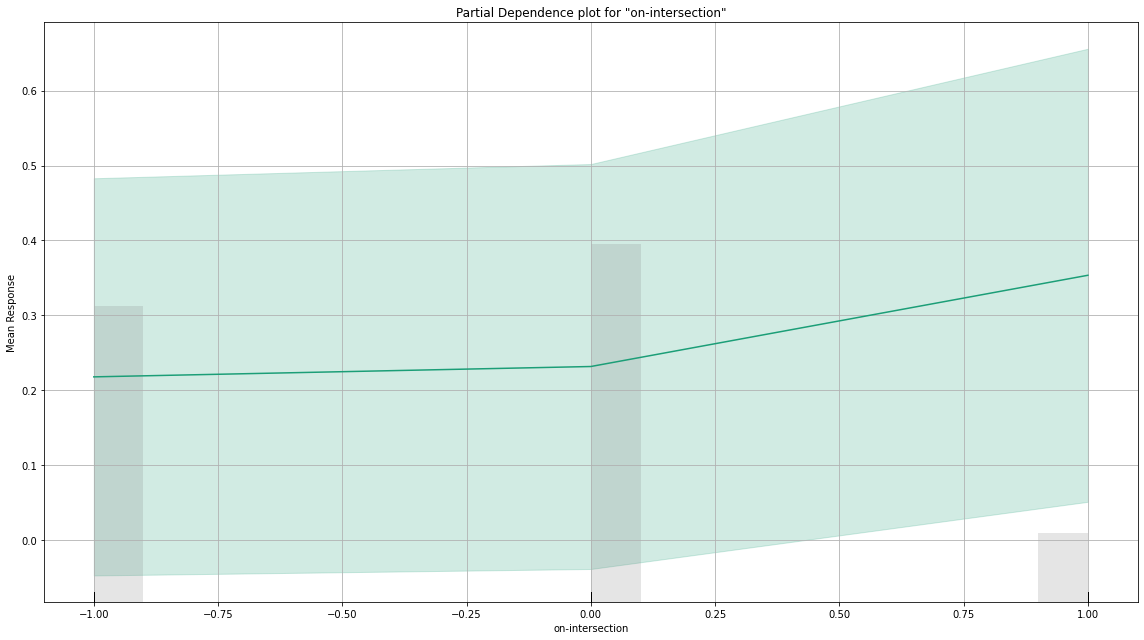

In [ ]:
# Explain a model
expl_mod = out.explain(validation)

**Show parameters of final model**

In [ ]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'balance_classes': {'actual': False, 'default': False, 'input': False},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'Enum',
  'default': 'AUTO',
  'input': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True, 'input': True},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'class_sampling_factors': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.7, 'default': 1.0, 'input': 0.7},
 'col_sample_rate_change_per_level': {'actual': 1.0,
  'default': 1.0,
  'input': 1.0},
 'col_sample_rate_per_tree': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'custom_distribution_func': {'actual': None, 'default': None, 'input': None},
 'custom_metric_func'

**Generate ROC Curve of best model**

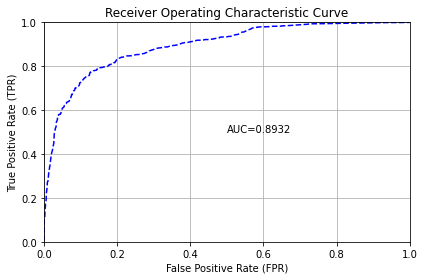


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20110349584647025: 


,,0,1,Error,Rate
0,0,35462.0,15423.0,0.3031,(15423.0/50885.0)
1,1,12384.0,90996.0,0.1198,(12384.0/103380.0)
2,Total,47846.0,106419.0,0.1803,(27807.0/154265.0)


<Figure size 432x288 with 0 Axes>

In [ ]:
perf_test = out.model_performance(test)
perf_test.plot(type = "roc",save_to_file='ROC_TEST')
perf_test.confusion_matrix()

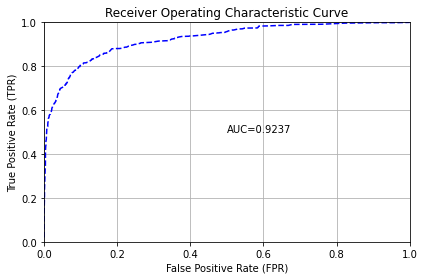


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2749646942993906: 


,,0,1,Error,Rate
0,0,69501.0,15807.0,0.1853,(15807.0/85308.0)
1,1,9588.0,70080.0,0.1203,(9588.0/79668.0)
2,Total,79089.0,85887.0,0.1539,(25395.0/164976.0)


<Figure size 432x288 with 0 Axes>

In [ ]:
perf_validation = out.model_performance(validation)
perf_validation.plot(type = "roc",save_to_file='ROC_VALIDATION')
perf_validation.confusion_matrix()

In [ ]:
out.varimp_plot()

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
# imports
# h2o Python API with specific classes
import h2o                                        
from h2o.estimators.gbm import H2OGradientBoostingEstimator       # for GBM
from h2o.estimators.random_forest import H2ORandomForestEstimator # for single tree
from h2o.backend import H2OLocalServer                            # for plotting local tree in-notebook
import numpy as np   # array, vector, matrix calculations
import pandas as pd  # DataFrame handling
# system packages for calling external graphviz processes
import os
import re
import subprocess
# in-notebook display
from IPython.display import Image
from IPython.display import display
h2o.init()
# create partial dependence plots for the mentioned features
train = h2o.import_file('train_V36.csv')
validation = h2o.import_file('val_V36.csv')
test = h2o.import_file('test_V36.csv')

out = h2o.load_model("GBM_grid__1_AutoML_20210403_091537_model_18")
print('done')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpik8cxny2
  JVM stdout: /tmp/tmpik8cxny2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpik8cxny2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_cmpjvd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
done


In [ ]:
out.pd_plot(frame=validation, column='is-on-stop-line', save_to_file='test')